In [1]:
import numpy as np


In [2]:
def sigmoid(x):
    return 1/(1+np.exp(x))

In [3]:
class Neuron:
    def __init__(self, weights, bias):
        self.weights=weights
        self.bias=bias

    def feedforward(self, input):
        out=np.dot(self.weights, input) + self.bias
        return sigmoid(out)
    

In [4]:
w=np.array([1,2])
b=2
neuron1=Neuron(w, b)
x=np.array([3, 5])
final=neuron1.feedforward(x)
print(final)

3.059022269256247e-07


In [5]:
#lets now code up a 3 layer feedforward neural network
#the first layer is the input layer having 3 neurons
# the 2nd layer is the output layer having 4 neurons
# and the 3rd layer is the output layer having 1 neuron activated by softmax function
# here w11 means weight of the first neuron for first layer, w12 means weight of the second neuron for first layer, etc..

def softmax(x):
    return np.exp(x)/(np.sum(np.exp(x)))

x=np.array([1.0, 2.0, -2.5])
w1=np.array([[2.0, 1.2, 3.2, 2.45], [2.23, 3.10, 3.30, 4.5], [-0.98, 2.09, -3.2, 0.8]])
b1=np.array([2.3, 4.5, 3.0, -1.2])
a1=sigmoid(np.dot(x, w1)+b1)
print("a1: \n",a1)

w2=np.array([1.2, -0.90, 0.3, 2.0])
b2=3.22
a2=softmax(np.dot(w2, a1)+b2)
print(a2)

a1: 
 [1.35379523e-05 1.26048177e-03 9.26136021e-10 2.61190319e-04]
1.0


In [6]:
# class nnetwork:
#     def __init__(self):
#         w1=np.array([[2.0, 1.2, 3.2, 2.45], [2.23, 3.10, 3.30, 4.5], [-0.98, 2.09, -3.2, 0.8]])
#         b1=np.array([2.3, 4.5, 3.0, -1.2])
#         w2=np.array([1.2, -0.90, 0.3, 2.0])
#         b2=3.22
#         self.layer1=Neuron(w1, b1)
#         self.layer2=Neuron(w2, b2)
    
#     def feedforward(self, x):
#         a1=self.layer1.

Let’s train our network to predict someone’s gender given their weight and height:
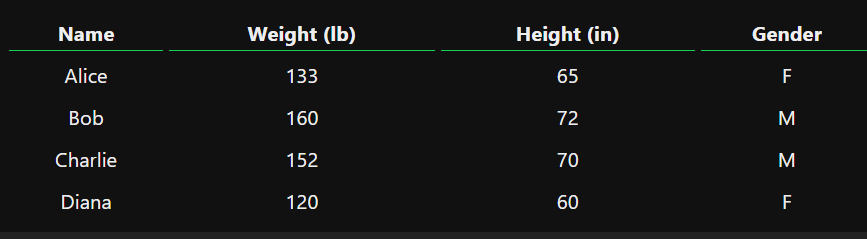


In [7]:
weight=np.array([133, 160, 152, 120])
height=np.array([65, 72, 70, 60])
# normalising the input from a central number

weight-=133
height-=65

In [8]:
x=np.array([weight, height])
x=x.T
#male is 1 and female is 0
y_true=np.array([0,1,1,0])
print(x)

[[  0   0]
 [ 27   7]
 [ 19   5]
 [-13  -5]]


In [9]:
#hidden layer
np.random.seed(42)
w1=np.random.rand(2, 2)
b1=np.random.rand( 1, 2)
a1 = sigmoid(np.dot(x, w1.T) + b1)
print(a1.shape)

(4, 2)


In [10]:
#output layer
np.random.seed(42)
w2=np.random.rand(2, 1)
b2=np.random.normal()
y_pred=sigmoid(np.dot(a1, w2)+b2)
print(y_pred.flatten())

[0.22119174 0.34351061 0.34351009 0.12207668]


In [11]:
def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

def sigmoid_derivative(x):
  fx=sigmoid(x)
  return fx*(1-fx)

In [12]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-8
    return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

# Data
weight = np.array([133, 160, 152, 120])
height = np.array([65, 72, 70, 60]) 
weight-=133
height-=66
x = np.array([weight, height]).T

y_true = np.array([0, 1, 1, 0]).reshape(-1, 1)

# Hyperparams
alpha = 0.01
epochs = 5000
m = x.shape[0]  # batch size = 4

# Initialize weights
np.random.seed(42)
w1 = np.random.randn(2, 2)
b1 = np.random.randn(1, 2)
w2 = np.random.randn(2, 1)
b2 = np.random.normal()

# Training loop
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(x, w1.T) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w2) + b2
    y_pred = sigmoid(z2)

    # Loss
    loss = binary_cross_entropy(y_true, y_pred)

    # Backpropagation
    dz2 = y_pred - y_true                     # (4, 1)
    dw2 = np.dot(a1.T, dz2) / m              # (2, 1)
    db2 = np.sum(dz2, axis=0) / m            # scalar

    dz1 = np.dot(dz2, w2.T) * sigmoid_derivative(z1)  # (4, 2)
    dw1 = np.dot(dz1.T, x) / m                        # (2, 2)
    db1 = np.sum(dz1, axis=0, keepdims=True) / m      # (1, 2)

    # Update weights
    w2 -= alpha * dw2
    b2 -= alpha * db2
    w1 -= alpha * dw1
    b1 -= alpha * db1

    if epoch % 100 == 0:
        print(f"loss at epoch {epoch} is {loss:.4f}")

# Final predictions
print("final predictions:\n", y_pred.flatten())


loss at epoch 0 is 0.4206
loss at epoch 100 is 0.3840
loss at epoch 200 is 0.3553
loss at epoch 300 is 0.3314
loss at epoch 400 is 0.3108
loss at epoch 500 is 0.2924
loss at epoch 600 is 0.2759
loss at epoch 700 is 0.2608
loss at epoch 800 is 0.2469
loss at epoch 900 is 0.2342
loss at epoch 1000 is 0.2225
loss at epoch 1100 is 0.2116
loss at epoch 1200 is 0.2016
loss at epoch 1300 is 0.1923
loss at epoch 1400 is 0.1837
loss at epoch 1500 is 0.1757
loss at epoch 1600 is 0.1682
loss at epoch 1700 is 0.1613
loss at epoch 1800 is 0.1549
loss at epoch 1900 is 0.1488
loss at epoch 2000 is 0.1432
loss at epoch 2100 is 0.1380
loss at epoch 2200 is 0.1330
loss at epoch 2300 is 0.1284
loss at epoch 2400 is 0.1240
loss at epoch 2500 is 0.1199
loss at epoch 2600 is 0.1161
loss at epoch 2700 is 0.1124
loss at epoch 2800 is 0.1090
loss at epoch 2900 is 0.1057
loss at epoch 3000 is 0.1026
loss at epoch 3100 is 0.0997
loss at epoch 3200 is 0.0969
loss at epoch 3300 is 0.0943
loss at epoch 3400 is 0.09

In [13]:
# testing out our neural network on a sample example
# it works well !!
x_new = np.array([[(128-133), (0)]])  # shape: (1, 2)

# Forward pass
z1 = np.dot(x_new, w1.T) + b1       # (1, 2)
a1 = sigmoid(z1)                    # (1, 2)
z2 = np.dot(a1, w2) + b2            # (1, 1)
y_pred = sigmoid(z2)                # (1, 1)

print("Prediction:", y_pred[0, 0])
if(y_pred>0.5):
    print("\nmale")
else:
    print("\nfemale")

Prediction: 0.0690186401179891

female
